Analizing The Electric_Vehicle_Dataset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#Load the data from csv file to Pandas Dataframe
df=pd.read_excel('/content/Electric_Vehicle_Population.xlsx')

In [48]:
#printing the first ten rows
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
5,3C3CFFGE1G,Thurston,Olympia,WA,98501.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,294762219,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
6,5YJ3E1EA4J,Snohomish,Marysville,WA,98271.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,39.0,270125096,POINT (-122.1677 48.11026),PUGET SOUND ENERGY INC,5.306105e+10
7,5YJ3E1EA3K,King,Seattle,WA,98102.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,43.0,238776492,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
8,1N4AZ0CP5E,Thurston,Yelm,WA,98597.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,2.0,257246118,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10
9,5YJSA1S25F,Thurston,Yelm,WA,98597.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,2.0,161974606,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


In [49]:
#printing the last ten rows
df.tail(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
232220,5YJ3E1EB6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,228222242,POINT (-122.58009 47.328),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
232221,JTDKN3DPXC,Penobscot,Brewer,ME,4412.0,2012,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,NaN,247180615,POINT (-68.76433 44.79559),NON WASHINGTON STATE ELECTRIC UTILITY,2.301900e+10
232222,5YJ3E1EA9R,King,Bellevue,WA,98006.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,272513426,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
232223,1G1RD6E4XE,Douglas,East Wenatchee,WA,98802.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,12.0,177858565,POINT (-120.29473 47.41515),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
232224,JA4J24A52J,Pacific,Ocean Park,WA,98640.0,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,19.0,110152549,POINT (-124.04987 46.49147),BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
232225,5YJ3E1EA3K,King,Renton,WA,98058.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,47.0,262629839,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
232226,1GKB0RDC1R,Snohomish,Snohomish,WA,98290.0,2024,GMC,HUMMER EV SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,261119043,POINT (-122.09305 47.91265),PUGET SOUND ENERGY INC,5.306105e+10
232227,7SAYGDED3R,King,Redmond,WA,98033.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,261726258,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
232228,JTMEB3FV5P,Chelan,Leavenworth,WA,98826.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,12.0,236639826,POINT (-120.65754 47.5982),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
232229,5YJYGDEE3M,Kitsap,Bremerton,WA,98312.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,138217341,POINT (-122.6563 47.56739),PUGET SOUND ENERGY INC,5.303509e+10


In [50]:
#number of rows and columns in the dataset
df.shape

(232230, 17)

In [51]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

In [52]:
#check the number of null or missing values in each column
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [53]:
#getting the description of the dataset
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,232226.000000,232230.000000,232203.000000,232203.000000,231749.000000,2.322300e+05,2.322260e+05
mean,98180.172044,2021.353727,46.755998,803.808973,28.880979,2.343671e+08,5.298177e+10
std,2489.407943,2.994884,84.373596,7246.597102,14.904503,6.831418e+07,1.507814e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,0.000000,42.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


Handeling the missing values

In [54]:
#Drop the "Legislative District" column from the Dataframe
if 'Legislative District' in df.columns:
    df=df.drop(columns='Legislative District',axis=1)

In [55]:
#print the first five rows of the dataset
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [56]:
#drop the "Base MSRP" column from the dataframe
if 'Base MSRP' in df.columns:
    df=df.drop(columns='Base MSRP',axis=1)

In [57]:
#print the first three rows of the dataset
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10


In [58]:
#replacing the missing values in "Electric Range" column with the mean value
df['Electric Range'].fillna(df['Electric Range'].mean(),inplace=True)

<ipython-input-58-c46c016921c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].mean(),inplace=True)


In [59]:
#print the first three rows
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10


In [60]:
#find the mode value of "2020 Census Tract" column
print(df['2020 Census Tract'].mode())

0    5.303303e+10
Name: 2020 Census Tract, dtype: float64


In [61]:
print(df['2020 Census Tract'].mode()[0])

53033028200.0


In [62]:
#replacing the missing values in '2020 Census Tract' column with mode value
df['2020 Census Tract'].fillna(df['2020 Census Tract'].mode()[0],inplace=True)

<ipython-input-62-9387a96a9ea1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['2020 Census Tract'].fillna(df['2020 Census Tract'].mode()[0],inplace=True)


In [63]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [64]:
#Drop the "Vehicle Location" column from the Dataframe
if 'Vehicle Location' in df.columns:
    df=df.drop(columns='Vehicle Location',axis=1)

In [65]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,186450183,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,478093654,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,274800718,PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,260758165,PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,236581355,PACIFICORP,5.307700e+10


In [66]:
#replacing the missing values in "County" column with the mean value
common_county = df['County'].mode()[0]
df['County'].fillna(common_county,inplace=True)

<ipython-input-66-b6b410eadb20>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['County'].fillna(common_county,inplace=True)


In [67]:
#replacing the missing values in "City" column with the mean value
common_city = df['City'].mode()[0]
df['City'].fillna(common_city,inplace=True)

<ipython-input-67-a958191cecf6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna(common_city,inplace=True)


In [68]:
#replacing the missing values in "Electric Utility" column with the mean value
common_Electric_Utility = df['Electric Utility'].mode()[0]
df['Electric Utility'].fillna(common_Electric_Utility,inplace=True)

<ipython-input-68-b175cebb4f1a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Utility'].fillna(common_Electric_Utility,inplace=True)


In [69]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [70]:
#replacing the missing values in "Electric Range" column with the mean value
common_Electric_Range = df['Electric Range'].mode()[0]
df['Electric Range'].fillna(common_Electric_Range,inplace=True)

<ipython-input-70-7d9dd2d09319>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(common_Electric_Range,inplace=True)


In [71]:
#replacing the missing values in "Postal Code" column with the mean value
common_Postal_Code = df['Postal Code'].mode()[0]
df['Postal Code'].fillna(common_Postal_Code,inplace=True)

<ipython-input-71-db93c5a464ec>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(common_Postal_Code,inplace=True)


In [72]:
#replacing the missing values in "2020 Census Tract" column with the mean value
common_2020_Census_Tract = df['2020 Census Tract'].mode()[0]
df['2020 Census Tract'].fillna(common_2020_Census_Tract,inplace=True)

<ipython-input-72-7dda05332560>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['2020 Census Tract'].fillna(common_2020_Census_Tract,inplace=True)


In [73]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [74]:
#find the mode value of "make" column
print(df['Make'].mode())

0    TESLA
Name: Make, dtype: object


In [75]:
print(df['Make'].mode()[0])

TESLA


In [76]:
#getting more about the data
df.describe()

,Postal Code,Model Year,Electric Range,DOL Vehicle ID,2020 Census Tract
count,232230.000000,232230.000000,232230.000000,2.322300e+05,2.322300e+05
mean,98180.169836,2021.353727,46.755998,2.343671e+08,5.298177e+10
std,2489.386560,2.994884,84.368691,6.831418e+07,1.507801e+09
min,1731.000000,1999.000000,0.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,4.792548e+08,5.602100e+10


In [77]:
#finding the number of the model made by company
df['Model'].value_counts()

,count
Model,
MODEL Y,48497
MODEL 3,35618
LEAF,13823
MODEL S,7864
BOLT EV,7162
...,...
918,1
OPTIQ,1
SQ6,1


In [78]:
df['Make'].value_counts()

,count
Make,
TESLA,99692
CHEVROLET,16919
NISSAN,15457
FORD,12461
KIA,11224
BMW,9505
TOYOTA,9265
HYUNDAI,7218
RIVIAN,6712


DATA VISUALIZATION

<Axes: xlabel='Make', ylabel='count'>

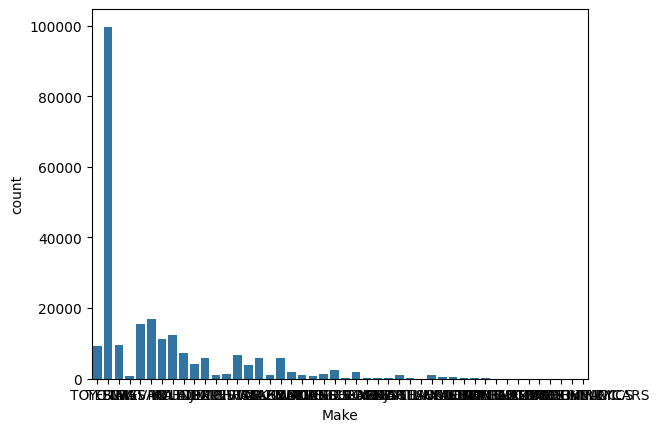

In [79]:
#creating a count plot for "make "column
sns.countplot(x='Make',data=df)

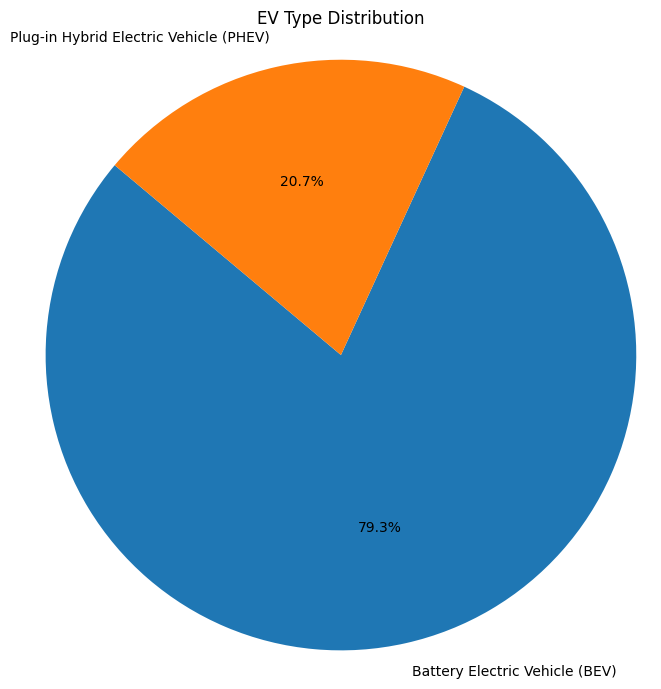

In [80]:
#Pie Chart: EV Type Distribution
ev_type_counts = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(ev_type_counts.values, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('EV Type Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

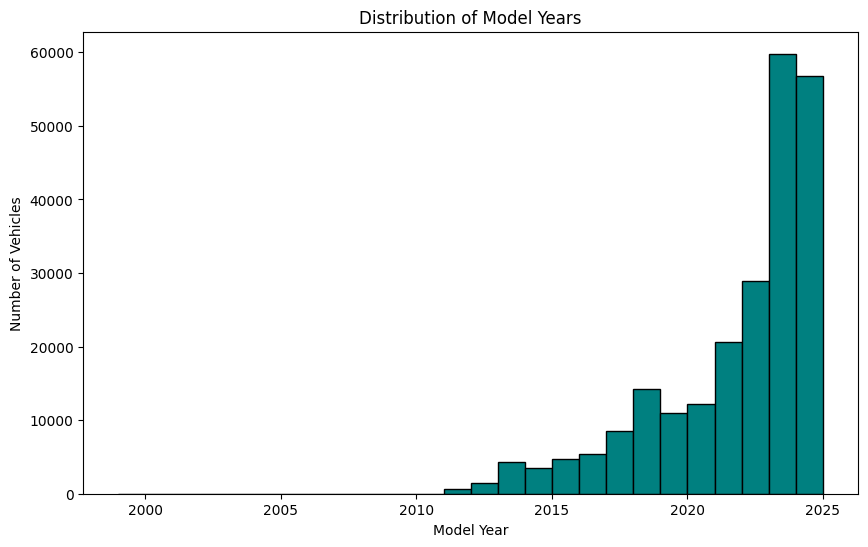

In [81]:
#Histogram: Distribution of Model Years
plt.figure(figsize=(10, 6))
plt.hist(df['Model Year'], bins=range(int(df['Model Year'].min()), int(df['Model Year'].max()) + 1), color='teal', edgecolor='black')
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.show()

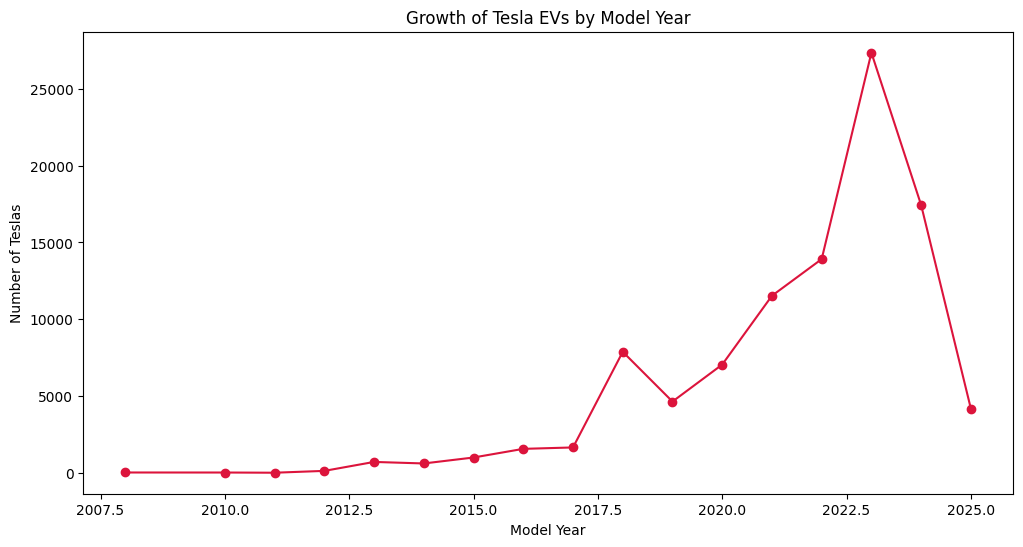

In [82]:
#Line Chart for Growth of Tesla Vehicles by Year
tesla_data = df[df['Make'] == 'TESLA']
tesla_by_year = tesla_data['Model Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(tesla_by_year.index, tesla_by_year.values, marker='o', linestyle='-', color='crimson')
plt.title('Growth of Tesla EVs by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Teslas')
plt.show()



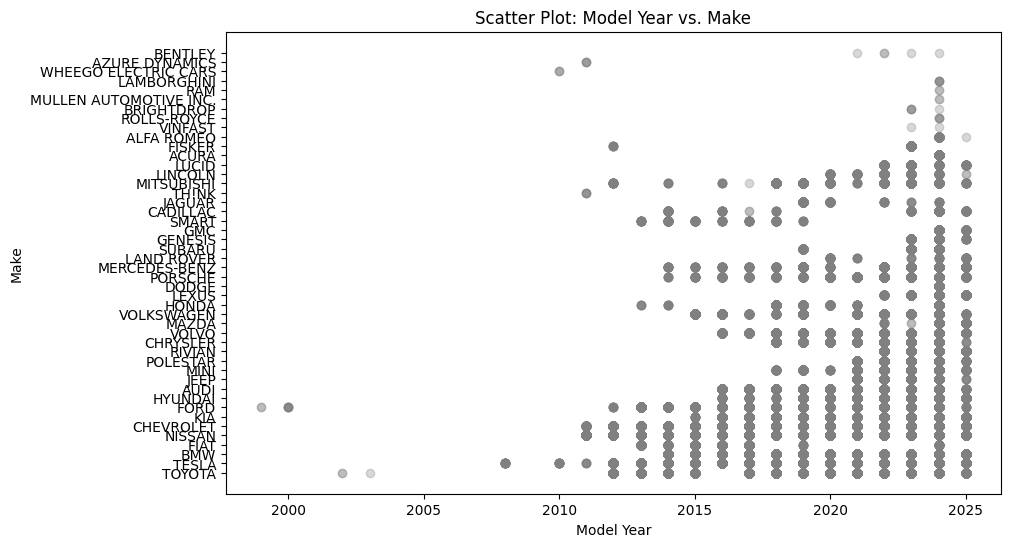

In [83]:
#Scatter Plot: Model Year vs. make
if 'Make' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Model Year'], df['Make'], alpha=0.3, color='gray')
    plt.title('Scatter Plot: Model Year vs. Make')
    plt.xlabel('Model Year')
    plt.ylabel('Make')
    plt.show()

<ipython-input-84-594c6ca8a168>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')


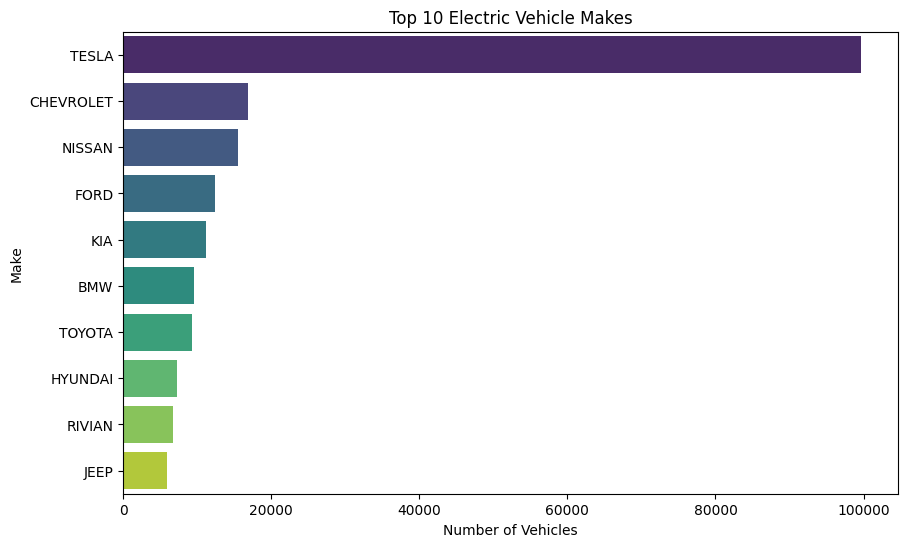

In [84]:
# Top 10 Makes (Manufacturers)
plt.figure(figsize=(10, 6))
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make')
plt.show()

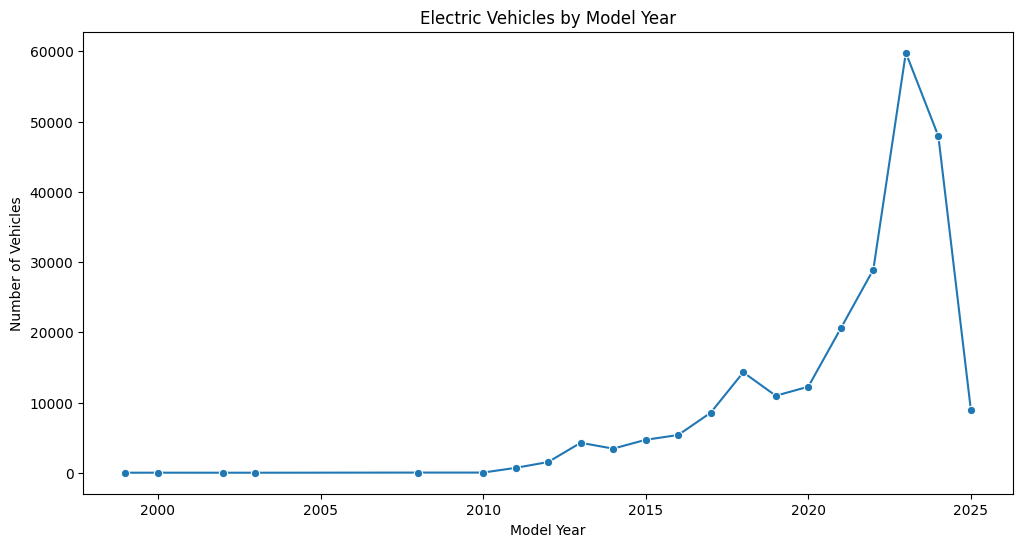

In [85]:
# Vehicle count by Model Year
plt.figure(figsize=(12, 6))
model_year_counts = df['Model Year'].value_counts().sort_index()
sns.lineplot(x=model_year_counts.index, y=model_year_counts.values, marker='o')
plt.title('Electric Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.show()

<ipython-input-86-b165b8036438>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_counts.values, y=ev_type_counts.index, palette='coolwarm')


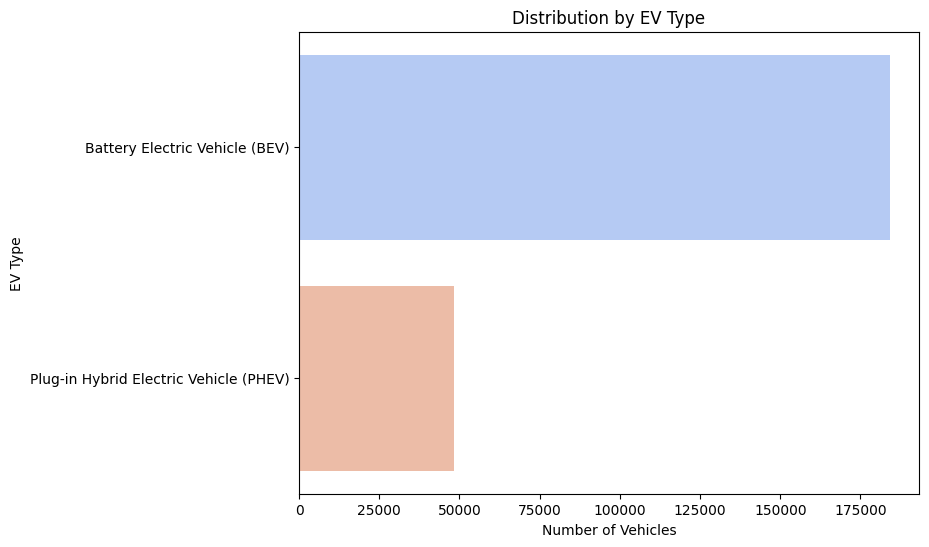

In [86]:
# Distribution by Electric Vehicle Type
plt.figure(figsize=(8, 6))
ev_type_counts = df['Electric Vehicle Type'].value_counts()
sns.barplot(x=ev_type_counts.values, y=ev_type_counts.index, palette='coolwarm')
plt.title('Distribution by EV Type')
plt.xlabel('Number of Vehicles')
plt.ylabel('EV Type')
plt.show()

<ipython-input-87-e1b1eaa8ef1f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_counts.values, y=county_counts.index, palette='mako')


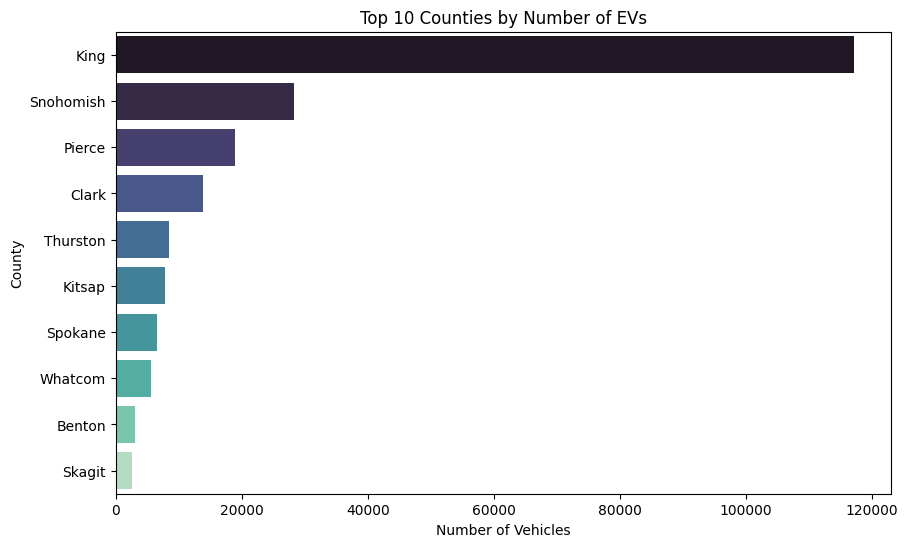

In [87]:
# Vehicles by County (Top 10)
plt.figure(figsize=(10, 6))
county_counts = df['County'].value_counts().head(10)
sns.barplot(x=county_counts.values, y=county_counts.index, palette='mako')
plt.title('Top 10 Counties by Number of EVs')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.show()

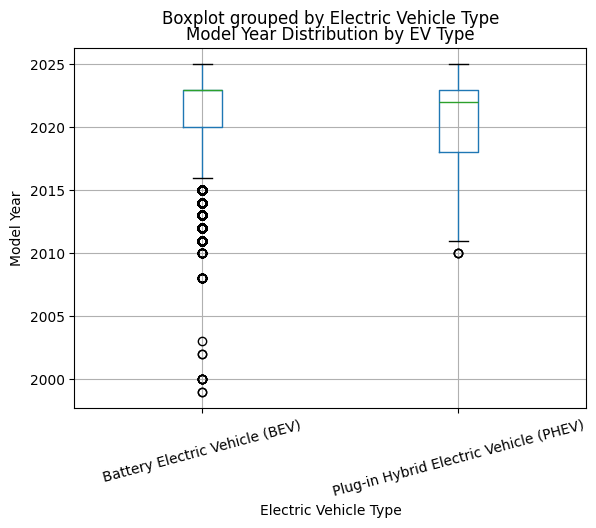

In [88]:
# Box plot of model years grouped by EV type
df.boxplot(column='Model Year', by='Electric Vehicle Type')
plt.title('Model Year Distribution by EV Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Model Year')
plt.xticks(rotation=15)
plt.show()